In [7]:
from openpyxl import Workbook, load_workbook
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows as df_to_row
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
from szp_funcs import print_df

In [3]:
path_to_file = 'C:/Users/PetukhovMD/Desktop/ХВС/data.xlsx'

In [4]:
res = pd.read_excel(path_to_file)

In [5]:
res

,sch,real,perc,type
0,ГБОУ Школа № 1501,2.918081,132.751453,Школы с интернатами
1,ГБОУ Школа № 108,4.878277,64.327298,Школы с интернатами
2,ГБОУ Школа ''Интеллектуал'',3.247956,35.721087,Школы с интернатами
3,ГБОУ Школа № 1454 ''Тимирязевская'',1.632934,33.313602,Школы с интернатами
4,ГБОУ Школа № 158,1.577868,28.601844,Школы с интернатами
...,...,...,...,...
559,ГБОУДО ЦВР ''Синегория'',0.070620,-28.777621,УДО без бассейнов
560,"ГБОУ ДО ЦРТДЮ ""Пресня""",0.117280,-32.729338,УДО без бассейнов
561,ГБДОУ Детский сад № 766,2.025221,111.675122,ДОУ
562,ГБДОУ Детский сад № 754 ''Солнышко'',4.345133,67.120490,ДОУ


In [13]:
res['real'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

count    564.000000
mean       1.283637
std        0.694475
min        0.000000
1%         0.076269
10%        0.735733
25%        0.968648
50%        1.214599
75%        1.454036
90%        1.883198
99%        3.957800
max        7.715274
Name: real, dtype: float64

In [14]:
res['perc'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

count     564.000000
mean       14.429895
std       129.482147
min       -86.961196
1%        -52.213345
10%       -21.181283
25%        -8.886947
50%         4.590207
75%        19.005333
90%        41.861450
99%       124.547765
max      2921.996774
Name: perc, dtype: float64

TypeError: cannot unpack non-iterable PathCollection object

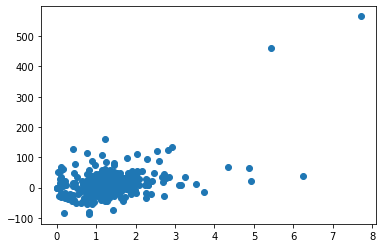

In [36]:
plt.scatter(x=res[res.perc < 1000]['real'].to_list(), y=res[res.perc < 1000]['perc'].to_list())

TypeError: 'PathCollection' object is not subscriptable

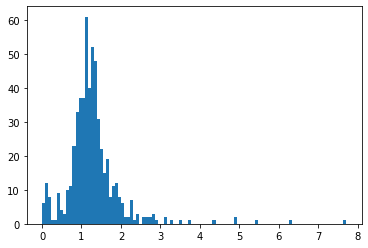

In [37]:
n_real, bins_real, patches_real = plt.hist(res['real'].to_list(), 100)

In [43]:
n_real

array([ 6., 12.,  8.,  1.,  1.,  9.,  4.,  3., 10., 11., 23., 33., 37.,
       37., 61., 40., 52., 48., 31., 22., 15., 19.,  8., 11., 12.,  8.,
        6.,  2.,  2.,  7.,  1.,  3.,  0.,  2.,  2.,  2.,  3.,  1.,  0.,
        0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [44]:
n_real.tolist().index(23)

10

In [42]:
n_real.tolist().index(22)

19

In [40]:
bins_real

array([0.        , 0.07715274, 0.15430549, 0.23145823, 0.30861097,
       0.38576372, 0.46291646, 0.5400692 , 0.61722195, 0.69437469,
       0.77152743, 0.84868018, 0.92583292, 1.00298566, 1.08013841,
       1.15729115, 1.2344439 , 1.31159664, 1.38874938, 1.46590213,
       1.54305487, 1.62020761, 1.69736036, 1.7745131 , 1.85166584,
       1.92881859, 2.00597133, 2.08312407, 2.16027682, 2.23742956,
       2.3145823 , 2.39173505, 2.46888779, 2.54604053, 2.62319328,
       2.70034602, 2.77749876, 2.85465151, 2.93180425, 3.00895699,
       3.08610974, 3.16326248, 3.24041522, 3.31756797, 3.39472071,
       3.47187346, 3.5490262 , 3.62617894, 3.70333169, 3.78048443,
       3.85763717, 3.93478992, 4.01194266, 4.0890954 , 4.16624815,
       4.24340089, 4.32055363, 4.39770638, 4.47485912, 4.55201186,
       4.62916461, 4.70631735, 4.78347009, 4.86062284, 4.93777558,
       5.01492832, 5.09208107, 5.16923381, 5.24638655, 5.3235393 ,
       5.40069204, 5.47784478, 5.55499753, 5.63215027, 5.70930

In [46]:
bins_real[11]

0.8486801779535343

In [47]:
bins_real[19]

1.4659021255561049

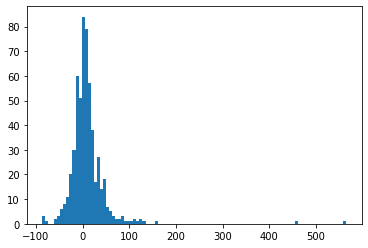

In [38]:
n_perc, bins_perc, patches_perc = plt.hist(res[res.perc < 1000]['perc'].to_list(), 100)

In [48]:
n_perc

array([ 3.,  1.,  0.,  0.,  2.,  3.,  6.,  8., 11., 20., 30., 60., 51.,
       84., 79., 57., 38., 17., 27., 14., 18.,  7.,  5.,  3.,  2.,  2.,
        3.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [50]:
n_perc.tolist().index(8)

7

In [51]:
bins_perc[8]

-34.759390467157154

In [52]:
n_perc.tolist().index(7)

21

In [53]:
bins_perc[21]

50.06854400471779

In [49]:
bins_perc

array([-86.9611963 , -80.43597057, -73.91074484, -67.38551911,
       -60.86029338, -54.33506765, -47.80984192, -41.2846162 ,
       -34.75939047, -28.23416474, -21.70893901, -15.18371328,
        -8.65848755,  -2.13326182,   4.3919639 ,  10.91718963,
        17.44241536,  23.96764109,  30.49286682,  37.01809255,
        43.54331828,  50.068544  ,  56.59376973,  63.11899546,
        69.64422119,  76.16944692,  82.69467265,  89.21989838,
        95.7451241 , 102.27034983, 108.79557556, 115.32080129,
       121.84602702, 128.37125275, 134.89647848, 141.42170421,
       147.94692993, 154.47215566, 160.99738139, 167.52260712,
       174.04783285, 180.57305858, 187.09828431, 193.62351003,
       200.14873576, 206.67396149, 213.19918722, 219.72441295,
       226.24963868, 232.77486441, 239.30009013, 245.82531586,
       252.35054159, 258.87576732, 265.40099305, 271.92621878,
       278.45144451, 284.97667023, 291.50189596, 298.02712169,
       304.55234742, 311.07757315, 317.60279888, 324.12

In [54]:
def give_real_grp(row):
    if row['real'] <= 0.8486:
        return 'small'
    if row['real'] >= 1.4659:
        return 'big'
    return 'avg'

In [55]:
def give_perc_grp(row):
    if row['perc'] <= -34.7593:
        return 'small'
    if row['perc'] >= 50.0685:
        return 'big'
    return 'avg'

In [57]:
res['real_grp'] = res.apply(lambda row: give_real_grp(row), axis=1)
res['perc_grp'] = res.apply(lambda row: give_perc_grp(row), axis=1)

In [58]:
res[(res.real_grp == 'small') & (res.perc_grp == 'small')]

,sch,real,perc,type,real_grp,perc_grp
287,ГБОУ Школа № 2087,0.707691,-38.707757,Школы с бассейнами,small,small
289,ГБОУ Школа № 1195,0.730113,-43.062485,Школы с бассейнами,small,small
292,ГБОУ Школа № 1238,0.390257,-43.861793,Школы с бассейнами,small,small
293,ГБОУ Школа № 1905,0.759395,-55.521508,Школы с бассейнами,small,small
295,ГБОУ Школа № 1539,0.829627,-86.961196,Школы с бассейнами,small,small
479,ГБОУ Школа № 1520 им. Капцовых,0.299794,-39.260042,Школы без интернатов и бассейнов,small,small
480,ГБОУ Школа № 2042,0.439582,-40.053869,Школы без интернатов и бассейнов,small,small
482,ГБОУ Школа № 1553 имени В.И. Вернадского,0.668762,-45.654161,Школы без интернатов и бассейнов,small,small
484,ГБОУ Школа № 1371 ''Крылатское'',0.604249,-49.962020,Школы без интернатов и бассейнов,small,small
485,ГБОУ Школа № 222,0.818746,-80.759408,Школы без интернатов и бассейнов,small,small


In [59]:
res[(res.real_grp == 'big') & (res.perc_grp == 'big')]

,sch,real,perc,type,real_grp,perc_grp
0,ГБОУ Школа № 1501,2.918081,132.751453,Школы с интернатами,big,big
1,ГБОУ Школа № 108,4.878277,64.327298,Школы с интернатами,big,big
9,ГБОУ Школа № 1220,7.715274,565.561377,Школы с бассейнами,big,big
10,ГБОУ Школа № 629,2.821034,123.853209,Школы с бассейнами,big,big
11,ГБОУ Школа № 1811,1.775820,96.658887,Школы с бассейнами,big,big
12,ГБОУ Школа № 2005,2.297164,95.137498,Школы с бассейнами,big,big
14,ГБОУ Школа № 851,2.167500,55.255592,Школы с бассейнами,big,big
296,ГБОУ Школа № 727,1.893258,2921.996774,Школы без интернатов и бассейнов,big,big
297,ГБОУ Школа № 1541,5.425375,460.839930,Школы без интернатов и бассейнов,big,big
301,ГБОУ Школа № 1065,2.590106,86.575206,Школы без интернатов и бассейнов,big,big


In [60]:
'/'.join(path_to_file.split('/')[:-1])

'C:/Users/PetukhovMD/Desktop/ХВС'

In [61]:
print_df(res, '/'.join(path_to_file.split('/')[:-1]) + '/для сводов')